# The Empirical Rule and Distribution

In week 2, we discussed the empirical rule or the 68 - 95 - 99.7 rule, which describes how many observations fall within a certain distance from our mean.  This distance from the mean is denoted as sigma, or standard deviation (the average distance an observation is from the mean).

The following image may help refresh your memory:

**Three Sigma Rule**

<img src='Mt3RyE0.png'>

For this tutorial, we will be exploring the number of hours the average college student gets.

The example used in lecture stated there was a mean of 7 and standard deviation of 1.7 for hours of sleep; we will use these same values.

In [24]:
import warnings
warnings.filterwarnings('ignore')
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

random.seed(1738)

In [25]:
pip install statsmodels

In [10]:
mu = 7

sigma = 1.7 # mu is the mean, sigma is the standard deviation

Observations = [random.normalvariate(mu, sigma) for i in range(100000)]

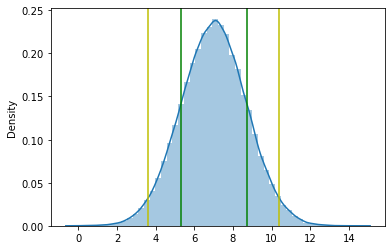

In [11]:
sns.distplot(Observations)

plt.axvline(np.mean(Observations) + np.std(Observations), color = "g")
plt.axvline(np.mean(Observations) - np.std(Observations), color = "g")

plt.axvline(np.mean(Observations) + (np.std(Observations) * 2), color = "y")
plt.axvline(np.mean(Observations) - (np.std(Observations) * 2), color = "y");

In [13]:
pd.Series(Observations).describe()

count    100000.000000
mean          7.000975
std           1.695514
min          -0.138618
25%           5.863234
50%           7.009851
75%           8.139339
max          14.578678
dtype: float64

In [14]:
SampleA = random.sample(Observations, 100)
SampleB = random.sample(Observations, 100)
SampleC = random.sample(Observations, 100)

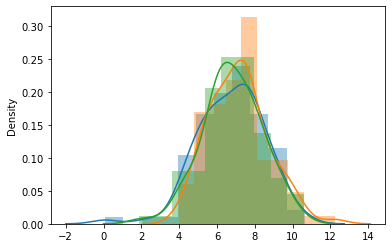

In [16]:
fig, ax=plt.subplots()
sns.distplot(SampleA, ax=ax)
sns.distplot(SampleB, ax=ax)
sns.distplot(SampleC, ax=ax);

Now that we have covered the 68 - 95 - 99.7 rule, we will take this a step further and discuss the empirical distribution.

The empirical distribution is a cumulative density function that signifies the proportion of observations that are less than or equal to a certain values.

Lets use the initial image above as an example of this concept:

<img src='Mt3RyE0.png'>

Now, by using our observations for hours of sleep, we can create an empirical distribution in python that signifies the proportion of observations are observed at a specific number for hours of sleep.

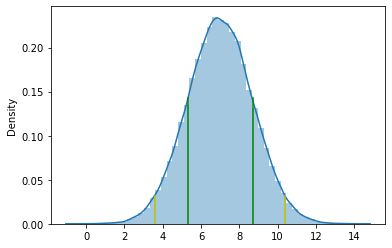

In [34]:
mu = 7

sigma = 1.7

Observations = [random.normalvariate(mu, sigma) for i in range(100000)]

sns.distplot(Observations)
plt.axvline(np.mean(Observations) + np.std(Observations), 0, .58, color = 'g')
plt.axvline(np.mean(Observations) - np.std(Observations), 0, .58, color = 'g')

plt.axvline(np.mean(Observations) + (np.std(Observations) * 2), 0, .13, color = 'y')
plt.axvline(np.mean(Observations) - (np.std(Observations) * 2), 0, .13, color = 'y')

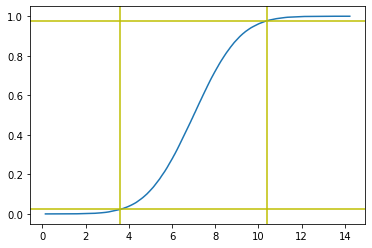

In [27]:
from statsmodels.distributions.empirical_distribution import ECDF
import matplotlib.pyplot as plt

ecdf = ECDF(Observations)

plt.plot(ecdf.x, ecdf.y)

plt.axhline(y = 0.025, color = 'y', linestyle='-')
plt.axvline(x = np.mean(Observations) - (2 * np.std(Observations)), color = 'y', linestyle='-')

plt.axhline(y = 0.975, color = 'y', linestyle='-')
plt.axvline(x = np.mean(Observations) + (2 * np.std(Observations)), color = 'y', linestyle='-');